In [9]:
import torch
import torchaudio
import numpy as np
from opus_binding import LibOPUSBinding
from src.models.components.extractors import *
from src.models.components import *

folder_path = "/dataHDD/chsaikeerthi/2024-chirumamilla/data/data"
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# joint_model = JointModel(input_size=90, output_size=192).to(device)
# xcross_model = XCorrModel(input_size=257, output_size=192).to(device)
# if_model = IFModel(input_size=90, output_size=192).to(device)

# for file_name in os.listdir(folder_path):
#     if file_name.endswith('.wav'):
#         file_path = os.path.join(folder_path, file_name)

#     # Load the WAV file
#     # waveform, sample_rate = torchaudio.load('/dataHDD/chsaikeerthi/2024-chirumamilla/data/data/preamble.wav')
#     waveform, sample_rate = torchaudio.load(file_path)
#     waveform = torchaudio.functional.resample(waveform=waveform, orig_freq=sample_rate, new_freq=16000)[...,:10*16000]
#     # Preprocess the audio if necessary (e.g., resampling, normalization)
#     waveform = waveform.to(device)
#     # Instantiate the encoders
#     xcorr_encoder = XCorrExt(N=320, H=160).to(device)
#     if_encoder = IFExt(N=320, H=160).to(device)

#     # Pass the audio data through each encoder
#     with torch.no_grad():
#         auto_corr_features = xcorr_encoder(waveform).to(device)
#         if_features = if_encoder(waveform).to(device)

#     # Now you have the features extracted by each encoder
#     print("Auto Correlation Features:", auto_corr_features.shape)
#     print("Instantaneous Frequency Features:", if_features.shape)
#     lib = LibOPUSBinding()

    

ModuleNotFoundError: No module named 'src.models.components'

sig shape (160000,)
waveform shape torch.Size([1, 160000])


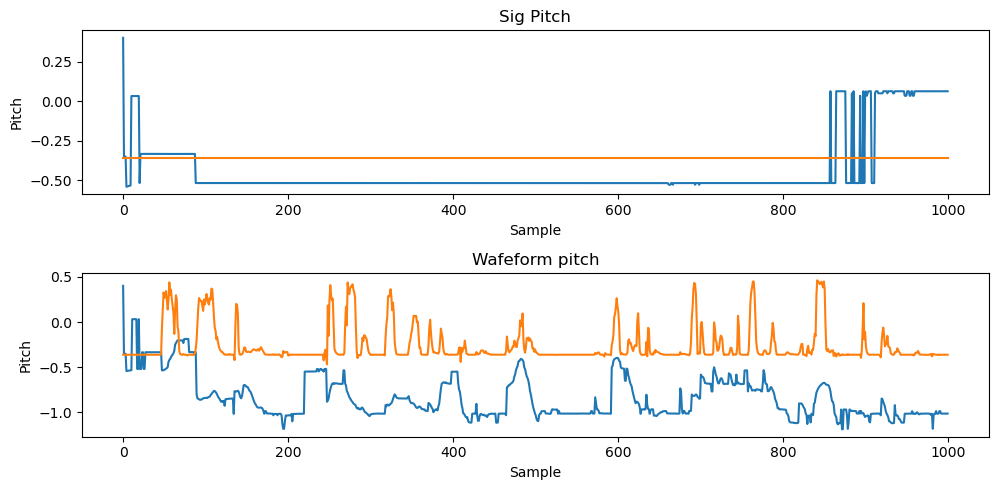

xcorr shape torch.Size([1, 320, 999])
encoded shape
torch.Size([1, 999, 64]) torch.Size([1, 999, 257])
xcorr shape torch.Size([1, 320, 999])


In [2]:
import matplotlib.pyplot as plt


sig = np.zeros((160000))
print("sig shape",sig.shape)
print("waveform shape",waveform.shape)
pitch_wavform = lib.extract_pitch(waveform.cpu().numpy()[0])
pitch_sig = lib.extract_pitch(sig)
#print("WAVEFORM_pitch",pitch_wavform)
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(pitch_sig)
plt.title('Sig Pitch')
plt.xlabel('Sample')
plt.ylabel('Pitch')
#print("SIG_pitch",pitch_sig)
# You can now pass these features to your model


plt.subplot(2, 1, 2)
plt.plot(pitch_wavform)
plt.title('Wafeform pitch')
plt.xlabel('Sample')
plt.ylabel('Pitch')
plt.tight_layout()
plt.show()


joint_output = joint_model(waveform)
if_output = if_model(waveform)
xcross_output = xcross_model(waveform)
if file_name == os.listdir(folder_path)[0]:
    summary(joint_model, waveform.shape)
    summary(if_model, waveform.shape)
    summary(xcross_model, waveform.shape)

In [7]:
from multiprocessing import Pool
import soundfile
from opus_binding import LibOPUSBinding
import os
def test_extract_pitch(file):
    
    lib = LibOPUSBinding()
    speech, _ = soundfile.read(file)
    features = lib.extract_pitch(speech)
    return features

# Create a pool of workers
with Pool(processes=8) as pool:
    # Use the pool to apply the test_extract_pitch function to each file in file_list
    data_folder = "/dataHDD/chsaikeerthi/2024-chirumamilla/data/MOCHA_TIMIT"
    file_list = [os.path.join(root, file) for root, _, files in os.walk(data_folder) for file in files if file == "signal.wav"]

    results = pool.map(test_extract_pitch, file_list)

# Print the results
for result in results:
    print(result)

IndexError: index 396 is out of bounds for axis 0 with size 396

In [23]:
from opus_binding import LibOPUSBinding
lib = LibOPUSBinding()
import soundfile
import numpy as np
import random
speech, _ = soundfile.read("/dataHDD/chsaikeerthi/2024-chirumamilla/data/MOCHA_TIMIT/faet0_002/signal.wav")
duration =1
sample_rate =16000
num_samples = int(sample_rate * duration )
max_start_time = len(speech) - num_samples
start_time = 0
end_time = start_time + num_samples
speech = speech[start_time:end_time]
features = lib.extract_pitch(speech)
print(features[:9])
pitch = np.load("/dataHDD/chsaikeerthi/2024-chirumamilla/data/MOCHA_TIMIT/mocha_timit_consensus_faet0_002/pitch.npy")
probab = np.load("/dataHDD/chsaikeerthi/2024-chirumamilla/data/MOCHA_TIMIT/mocha_timit_consensus_faet0_002/probability.npy")

print(probab[:9])
print(pitch[:9])

[[ 0.40166545 -0.36157173]
 [-0.35005724 -0.36204192]
 [-0.35031211 -0.3616282 ]
 [-0.35137963 -0.36153278]
 [-0.54210371 -0.36154616]
 [-0.54061866 -0.36155182]
 [-0.53897417 -0.36155021]
 [-0.53709066 -0.36154604]
 [-0.53583163 -0.36155015]]
[0.10526316 0.10526316 0.15789473 0.21052632 0.10526316 0.10526316
 0.15789473 0.15789473 0.15789473]
[186.72757 186.72758 181.17305 189.7944  188.52258 188.52258 175.44342
 176.68797 191.58327]


In [1]:
!pip install torchlpc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 60.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 61.6 MB/s eta 0:00:00:00:0100:01


In [7]:
import torch
from torchlpc import sample_wise_lpc

x = torch.randn(10, 100)

# Create a batch of 10 sets of LPC coefficients, each with 100 time steps and an order of 3
A = torch.randn(10, 100, 3)

# Apply LPC filtering
y = sample_wise_lpc(x, A)
y = 



RuntimeError: shape '[32, 16000, 320]' is invalid for input of size 1536000

In [5]:
!pip install librosa

sr 16000
y torch.Size([1, 47500])
a  [ 1.         -0.45960885 -0.3445313  -0.14382657]
a shape (4,)
b shape (4,)
y_hat (47500,)


Text(0.5, 1.0, 'LP Model Forward Prediction')

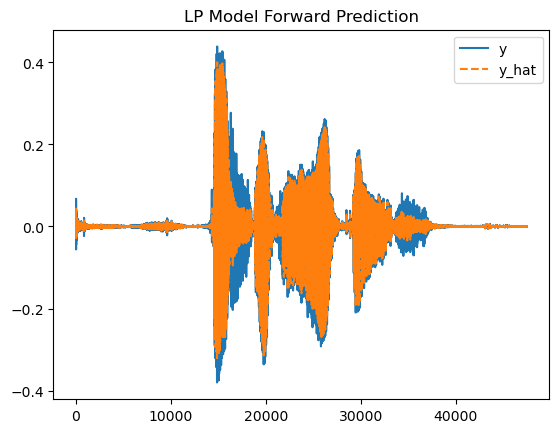

In [24]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import librosa
import torch
import torchaudio
y, sr = torchaudio.load("/dataHDD/chsaikeerthi/2024-chirumamilla/data/MOCHA_TIMIT/faet0_001/signal.wav")
print("sr",sr)
print   ("y",y.shape)
y = y[-1].numpy()
librosa.lpc(y, order=16)

a = librosa.lpc(y, order=3)
print("a ",a)
b = np.hstack([[0], -1 * a[1:]])
print("a shape",a.shape)
print("b shape",b.shape)

y_hat = scipy.signal.lfilter(b, [1], y)
print("y_hat",y_hat.shape)
fig, ax = plt.subplots()
ax.plot(y)
ax.plot(y_hat, linestyle='--')
ax.legend(['y', 'y_hat'])
ax.set_title('LP Model Forward Prediction')



In [25]:
!pip install audiolazy

3203.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 11.0 MB/s eta 0:00:00


In [26]:
import librosa
import numpy as np
from audiolazy import lazy_lpc

def readWave(filename, frame_len):
    wave_data, fs = librosa.load(filename, sr=None, mono=False, dtype='float64')
    length = len(wave_data)
    n = frame_len / 2
    last = length % n
    if last != 0:  # If samples are not an integer multiple of N/2, then zeros should be filled in.
        new_len = length + n - last
        wave_data = np.append(wave_data, np.zeros(int(n - last)))
        frame = int(new_len / n - 1)
    else:
        frame = int(length / n - 1)
    return wave_data, frame, fs


def writeWave(path, data, fs):
    librosa.output.write_wav(path, data, fs)

def getLPC(wav, frame, frame_len, order):
    n = int(frame_len / 2)
    win = np.hanning(frame_len)
    wav_frame = np.empty([frame, frame_len])  # 默认float64
    lpc_frame = np.empty([frame, order + 1])
    for i in range(0, frame):
        wav_frame[i, :] = wav[i * n: (i + 2) * n] * win
        # temp = audiolazy.lazy_lpc.lpc(wav_frame[i, :], order)
        # lpc_frame[i, :] = temp.numerator
        lpc_frame[i, :] = lazy_lpc.lpc(wav_frame[i, :], order).numerator
    return lpc_frame, wav_frame




frame_len = 512
order = 20
file_name = r"hvd_001_5.wav"
wav_in, frame, fs = readWave(file_name, frame_len)
lpc_frame, wav_frame = getLPC(wav_in, frame, frame_len, order)



ImportError: cannot import name 'Sequence' from 'collections' (/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/collections/__init__.py)

In [49]:
import librosa
from torchlpc import sample_wise_lpc
y, sr = librosa.load("/dataHDD/chsaikeerthi/2024-chirumamilla/data/MOCHA_TIMIT/faet0_001/signal.wav")
a = librosa.lpc(y, order=2)

print("y",y.shape)  
print("a",a.shape)
y = sample_wise_lpc(y, a)



y (65461,)
a (3,)


AssertionError: 

In [13]:
from LPCTorch.lpctorch.lpc import LPCCoefficients


y (441,)
a  (3,)
y_hat (441,)


Text(0.5, 1.0, 'LP Model Forward Prediction')

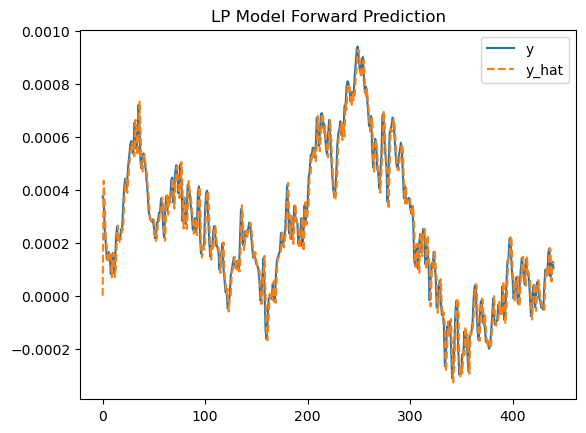

In [50]:
import matplotlib.pyplot as plt
import scipy
y, sr = librosa.load(librosa.ex('libri1'), duration=0.020)
print("y",y.shape)
a = librosa.lpc(y, order=2)
print("a ",a.shape)
b = np.hstack([[0], -1 * a[1:]])
y_hat = scipy.signal.lfilter(b, [1], y)
print("y_hat",y_hat.shape)
fig, ax = plt.subplots()
ax.plot(y)
ax.plot(y_hat, linestyle='--')
ax.legend(['y', 'y_hat'])
ax.set_title('LP Model Forward Prediction')

In [ ]:
from LPCTorch.lpctorch.lpc import LPCCoefficients
import torch
import torchaudio
import numpy as np
import librosa
import matplotlib.pyplot as plt
import scipy
from torch.nn import functional as F

x, sr = torchaudio.load(librosa.ex('trumpet'))
x_pad = F.pad(x,(0,160))
samples = x[-1]
win_len = 320
frames = x_pad.unfold(-1,320,160)
lpc = LPCCoefficients(order=20)
lpcc = lpc(x)
coef= lpcc[-1,:,:]
residual = torch.empty_like(frames)
for frame in range(frames.size(1)):
    res = scipy.signal.lfilter(np.array(coef[frame,:]), np.array([1]), frames[:, frame])
    residual[:, frame] = torch.Tensor(res)

print("residual",residual)

frame_index = 0  # change this to select a different frame
frames_np = frames[:, frame_index].numpy()
residual_np = residual[:, frame_index].numpy()

# Plot the original frame
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frames_np)
plt.title('Original Frame')

# Plot the residual
plt.subplot(2, 1, 2)
plt.plot(residual_np)
plt.title('Residual')

plt.tight_layout()
plt.show()

In [16]:
from LPCTorch.lpctorch.lpc import LPCCoefficients
import torch
import torchaudio
import numpy as np
import librosa
import matplotlib.pyplot as plt
import scipy
from torch.nn import functional as F

x, sr = torchaudio.load(librosa.ex('trumpet'))
x_pad = F.pad(x,(0,160))
samples = x[-1]
win_len = 320
frames = x_pad.unfold(-1,320,160)
lpc = LPCCoefficients(order=20)
lpcc = lpc(x)
coef= lpcc[-1,:,:]
residual = torch.empty_like(frames)
for frame in range(frames.size(1)):
    res = scipy.signal.lfilter(np.array(coef[frame,:]), np.array([1]), frames[:, frame])
    residual[:, frame,:] = torch.Tensor(res)



frame_index = 0  # change this to select a different frame
frames_np = frames[:, frame_index].numpy()
residual_np = residual[:, frame_index].numpy()

# Normalize the data
frames_np_norm = (frames_np - frames_np.min()) / (frames_np.max() - frames_np.min())
residual_np_norm = (residual_np - residual_np.min()) / (residual_np.max() - residual_np.min())
print("residual",residual_np_norm)
print('frames_np_norm:', frames_np_norm.min(), frames_np_norm.max(), frames_np_norm.mean())
print('residual_np_norm:', residual_np_norm.min(), residual_np_norm.max(), residual_np_norm.mean())
print('Shape of residual:', residual.shape)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frames_np_norm)  
plt.title('Original Frame')

# Plot the residual
plt.subplot(2, 1, 2)
plt.plot(residual_np_norm)  # plot only every 10th sample
plt.title('Residual')

plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (995213199.py, line 36)

In [1]:
!pip install egaznepy/
import sys
sys.path.append('/dataHDD/chsaikeerthi/2024-chirumamilla/src/egaznepy/')

Processing ./egaznepy
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for egaznepy: filename=egaznepy-0.1.1-py3-none-any.whl size=8387 sha256=809afe41f43d19c730938db520d68dba979c58cce710c95eedf13169b940d909
  Stored in directory: /tmp/pip-ephem-wheel-cache-8gkhhmx9/wheels/53/95/fa/67ba3838fe3e19fab22b8dcf0ecec401ea49ccbf1512a48e57
Successfully built egaznepy
  Attempting uninstall: egaznepy
    Found existing installation: egaznepy 0.1.1
    Uninstalling egaznepy-0.1.1:
      Successfully uninstalled egaznepy-0.1.1


In [2]:
import sys
sys.path.append('/dataHDD/chsaikeerthi/2024-chirumamilla/src')
sys.path.append('.')
#sys.path.append('/dataHDD/chsaikeerthi/2024-chirumamilla/src/data')
sys.path.append('/dataHDD/chsaikeerthi/2024-chirumamilla/src/models/components/')
sys.path.append('/dataHDD/chsaikeerthi/2024-chirumamilla/src/egaznepy/')
sys.path

['/home/chsaikeerthi@alabsad.fau.de/2024-chirumamilla',
 '/dataHDD/chsaikeerthi/2024-chirumamilla/notebooks',
 '/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python310.zip',
 '/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10',
 '/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/lib-dynload',
 '',
 '/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/site-packages',
 '/dataHDD/chsaikeerthi/2024-chirumamilla',
 '/dataHDD/chsaikeerthi/opus-binding/src',
 '/dataHDD/chsaikeerthi/2024-chirumamilla/src/egaznepy/',
 '/dataHDD/chsaikeerthi/2024-chirumamilla/src',
 '.',
 '/dataHDD/chsaikeerthi/2024-chirumamilla/src/models/components/',
 '/dataHDD/chsaikeerthi/2024-chirumamilla/src/egaznepy/']

residual [0.5771475  0.6554945  0.58079517 0.6136266  0.59283066 0.61468875
 0.6113037  0.61055416 0.5994155  0.6230972  0.6004553  0.5927214
 0.60052735 0.59605676 0.64845645 0.587397   0.6172654  0.58679855
 0.62977475 0.56364053 0.65596867 0.54768604 0.6766332  0.4851614
 1.         0.7544691  0.         0.7358695  0.75096714 0.66615236
 0.26542544 0.46738222 0.7068059  0.6619305  0.6710379  0.5972638
 0.5648115  0.6328481  0.65432143 0.57351536 0.621366   0.7335609
 0.70139635 0.51436436 0.7528972  0.80950016 0.6612462  0.4671438
 0.4909941  0.48820966 0.5167955  0.5868594  0.6508348  0.67418915
 0.6864719  0.652871   0.59192145 0.59233665 0.6104364  0.6018121
 0.52732056 0.6131969  0.6393703  0.5643875  0.48974007 0.5360866
 0.6214324  0.6801592  0.66843784 0.63220423 0.6011722  0.5723451
 0.57460904 0.57900214 0.58365345 0.5741928  0.6023069  0.64788616
 0.69657433 0.680475   0.6202945  0.5954865  0.557595   0.5263654
 0.573619   0.6466626  0.64343953 0.64765257 0.655417   0.6116

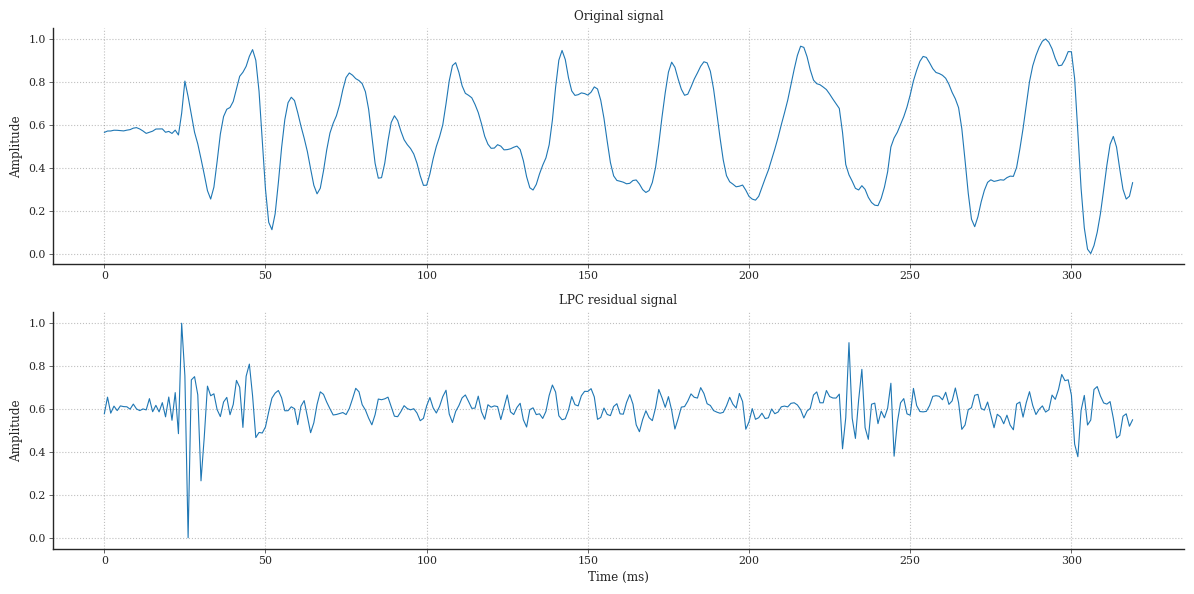

In [7]:
from LPCTorch.lpctorch.lpc import LPCCoefficients
import torch
import torchaudio
import numpy as np
import librosa
import matplotlib.pyplot as plt
import scipy
from torch.nn import functional as F
from egaznepy.visualize import apply_plot_style

x, sr = torchaudio.load(librosa.ex('trumpet'))
x_pad = F.pad(x,(0,160))
samples = x[-1]
win_len = 320
frames = x_pad.unfold(-1,320,160)
lpc = LPCCoefficients(order=20)
lpcc = lpc(x)
coef= lpcc[-1,:,:]
residual = torch.empty_like(frames)
for frame in range(frames.size(1)):
    res = scipy.signal.lfilter(np.array(coef[frame,:]), np.array([1]), frames[:, frame])
    residual[:, frame,:] = torch.Tensor(res)

frame_index = 0  # change this to select a different frame
frames_np = frames[0, frame_index].numpy()
residual_np = residual[0, frame_index].numpy()

# Normalize the data
frames_np_norm = (frames_np - frames_np.min()) / (frames_np.max() - frames_np.min())
residual_np_norm = (residual_np - residual_np.min()) / (residual_np.max() - residual_np.min())
print("residual",residual_np_norm)
print('frames_np_norm:', frames_np_norm.min(), frames_np_norm.max(), frames_np_norm.mean())
print('residual_np_norm:', residual_np_norm.min(), residual_np_norm.max(), residual_np_norm.mean())
print('Shape of residual:', residual.shape)
apply_plot_style(0.9)
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frames_np_norm)  
plt.title('Original signal')

plt.ylabel('Amplitude')


# Plot the residual
plt.subplot(2, 1, 2)
plt.plot(residual_np_norm)  # plot only every 10th sample
plt.title('LPC residual signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [5]:
import numpy as np
from opus_binding import LibOPUSBinding
lib = LibOPUSBinding()
sig = np.zeros((16000))
pitch = lib.extract_pitch(sig)
print("pitch",pitch)


pitch [[ 0.40166545 -0.3615565 ]
 [-0.35010493 -0.3615565 ]
 [-0.35074472 -0.3615565 ]
 [-0.35109377 -0.3615565 ]
 [-0.54234266 -0.3615565 ]
 [-0.54053128 -0.3615565 ]
 [-0.5387485  -0.3615565 ]
 [-0.53708959 -0.3615565 ]
 [-0.53593695 -0.3615565 ]
 [-0.53431511 -0.3615565 ]
 [ 0.03259194 -0.3615565 ]
 [ 0.03251219 -0.3615565 ]
 [ 0.03250539 -0.3615565 ]
 [ 0.03253615 -0.3615565 ]
 [ 0.03253484 -0.3615565 ]
 [ 0.03242838 -0.3615565 ]
 [ 0.032354   -0.3615565 ]
 [ 0.0325712  -0.3615565 ]
 [ 0.03239322 -0.3615565 ]
 [ 0.03241599 -0.3615565 ]
 [-0.51869333 -0.3615565 ]
 [-0.33445954 -0.3615565 ]
 [-0.33426642 -0.3615565 ]
 [-0.33408844 -0.3615565 ]
 [-0.33410954 -0.3615565 ]
 [-0.3342402  -0.3615565 ]
 [-0.33409452 -0.3615565 ]
 [-0.33391476 -0.3615565 ]
 [-0.33384919 -0.3615565 ]
 [-0.33419132 -0.3615565 ]
 [-0.33422267 -0.3615565 ]
 [-0.33403683 -0.3615565 ]
 [-0.33413935 -0.3615565 ]
 [-0.33406603 -0.3615565 ]
 [-0.33419859 -0.3615565 ]
 [-0.33400357 -0.3615565 ]
 [-0.33400297 -0.36155

In [16]:
import torch
import torchaudio

from opus_binding import LibOPUSBinding

import numpy as np
import torch
def convert_log_lag_to_hz(log_lag, sampling_rate):
    # Convert logarithmic lag values to actual lag values
    lag = torch.exp(log_lag)
    # Avoid division by zero
    lag = torch.where(lag == 0, torch.tensor(float('inf')), lag)
    # Convert lag to frequency in Hz
    frequency = sampling_rate / lag
    frequency = torch.clamp(frequency, min=60, max=600)
    return frequency

def calculate_pitch_frequency(normalized_pitch_lag):
    # Define the mapping of normalized pitch lag values to frequencies
    # leftmost being 500 Hz (lag: 25 samples) rightmost being 62.5 Hz (lag: 200 samples)
    leftmost_pitch_lag = -1.5
    rightmost_pitch_lag = 1.5
    leftmost_frequency = 500  # Hz
    rightmost_frequency = 62.5  # Hz

    # Perform linear interpolation
    frequency = leftmost_frequency + \
                (normalized_pitch_lag - leftmost_pitch_lag) * \
                ((rightmost_frequency - leftmost_frequency) / 
                (rightmost_pitch_lag - leftmost_pitch_lag))
    
    return frequency

# Initialize the RCAMetric class


# Extract pitch
lib = LibOPUSBinding()
y, sr = torchaudio.load("/dataHDD/chsaikeerthi/2024-chirumamilla/data/MOCHA_TIMIT/faet0_001/signal.wav")
pitch = lib.extract_pitch(sig)
print("pitch",pitch.shape)
pitch_lag_values = pitch[:, 0]

# Convert pitch lag values to pitch frequencies using calculate_pitch_frequency function
pitch_frequencies = calculate_pitch_frequency(pitch_lag_values)
print("Pitch frequencies:", pitch_frequencies)

# Convert numpy array to torch tensor



pitch (99, 2)
Pitch frequencies: [222.67378867 332.30696867 332.40027229 332.45117466 360.34163833
 360.07747799 359.81748998 359.57556466 359.40747211 359.17095343
 276.4970089  276.50863926 276.50963018 276.50514493 276.50533617
 276.52086069 276.53170874 276.50003384 276.52598917 276.5226687
 356.89277699 330.02535005 329.99718686 329.97123152 329.97430861
 329.99336223 329.97211814 329.94590203 329.93634045 329.98623451
 329.99080668 329.96370395 329.97865478 329.9679632  329.98729497
 329.95885362 329.9587667  329.93962616 329.93218551 329.93561029
 329.95003959 329.96071378 329.96918013 329.98842498 329.98546958
 329.98489588 329.98694728 329.98757313 329.99334484 330.01147707
 330.01528432 330.01420647 330.01145969 330.00853906 330.00033349
 330.00346273 330.00177642 330.02804468 330.01909157 330.02573252
 330.01957834 330.01276354 330.01556247 329.99264946 330.00572274
 329.98938113 329.98974621 329.99788225 329.99654363 329.99572655
 330.01170307 330.00189811 330.00687013 330.

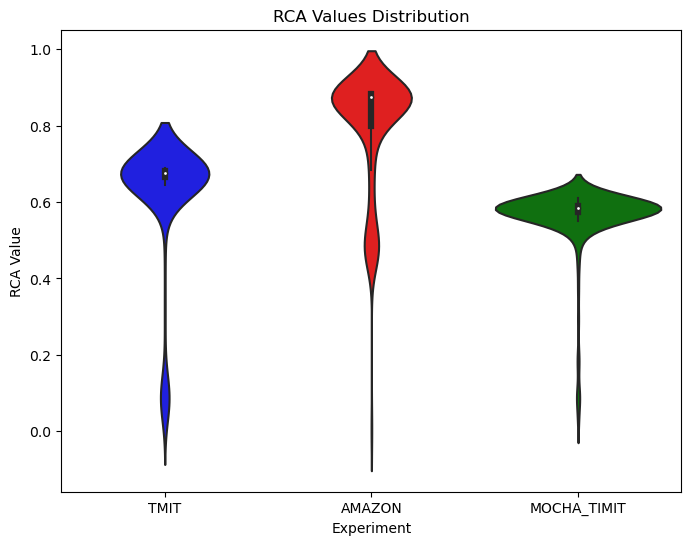

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df1 = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/logs/debug/runs/2024-05-26_15-10-18/tensorboard/version_0/val_rca_values.csv', header=None, names=['RCA'])
df2 = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/logs/debug/runs/2024-05-27_11-38-08/tensorboard/version_0/val_rca_values.csv', header=None, names=['RCA'])
df3 = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/logs/train/runs/2024-05-26_18-26-14/tensorboard/version_0/val_rca_values.csv', header=None, names=['RCA'])

df1['Experiment'] = 'TMIT'
df2['Experiment'] = 'AMAZON'
df3['Experiment'] = 'MOCHA_TIMIT'

df = pd.concat([df1, df2,df3])
# Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Experiment', y='RCA', palette=['blue', 'red','green'])


# Add title and labels
plt.title('RCA Values Distribution')
plt.xlabel('Experiment')
plt.ylabel('RCA Value')


# Show the plot
plt.show()

In [ ]:
# library imports
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import pytorch_lightning as pl
from opus_binding import LibOPUSBinding
from data.mocha_timit_datamodule import MTIMITDataModule


data_module = MTIMITDataModule(
    data_dir="/dataHDD/chsaikeerthi/2024-chirumamilla/data/",
    dataset="TIMIT"
)

# Prepare and setup data
data_module.prepare_data()
data_module.setup(stage='train')

dataloader = data_module.test_dataloader()
batch = next(iter(dataloader))
x, y_pitch, y_prob = batch


# visualize the histogram of frame energies (like in opus evaluation repo)

import matplotlib.pyplot as plt
import numpy as np

# Example tensor data
pitch_values = np.array([...])  
probabilities = np.array([...])  

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(pitch_values, probabilities, width=0.1, alpha=0.7, color='b')

# Add labels and title
plt.xlabel('Pitch Values')
plt.ylabel('Probabilities')
plt.title('Histogram of Pitch Values and Probabilities')

# Show plot
plt.show()

import os
import numpy as np
import matplotlib.pyplot as plt

def accumulate_pitch_probability(directory):
    all_pitch = []
    all_probability = []
    
    # Iterate through each directory
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            if file == 'pitch.npy':
                pitch_file = os.path.join(subdir, file)
                probability_file = os.path.join(subdir, 'probability.npy')
                
                # Load pitch and probability data
                pitch = np.load(pitch_file)
                probability = np.load(probability_file)
                
                # Accumulate pitch and probability data
                all_pitch.extend(pitch)
                all_probability.extend(probability)
                
    return np.array(all_pitch), np.array(all_probability)

def plot_pitch_probability_histogram(pitch, probability):
    # Visualize pitch and probability as a histogram
    plt.figure(figsize=(10, 6))
    plt.hist(pitch, bins=500, weights=probability, color='blue', alpha=0.7)
    plt.xlabel('Pitch (Hz)')
    plt.ylabel('Probability')
    plt.title('Probability Histogram with Pitch')
    axes = plt.gca()
    axes.set_xlim(0,500)
    
    plt.grid()
    plt.show()

# Directory containing pitch and probability files
directory = '/dataHDD/chsaikeerthi/2024-chirumamilla/data/TIMIT/'

# Accumulate pitch and probability data from all files
pitch, probability = accumulate_pitch_probability(directory)
print(probability)
# Plot histogram of probability values with pitch values
plot_pitch_probability_histogram(pitch, probability)


def plot_weighted_kde(pitches, probabilities):
    # Filter out zero probabilities
   

    # Create the weighted KDE
    kde = gaussian_kde(pitches, weights=probabilities)

    # Generate values for the x-axis
    pitch_range = np.linspace(min(pitches), max(pitches), 1000)

    # Evaluate the KDE on the x values
    kde_values = kde(pitch_range)

    # Plot the KDE
    plt.figure(figsize=(10, 6))
    plt.plot(pitch_range, kde_values, label='Weighted KDE')
    plt.xlabel('Pitch')
    plt.ylabel('Density')
    plt.title('Weighted KDE Plot of Pitch Values')
    plt.legend()
    plt.show()

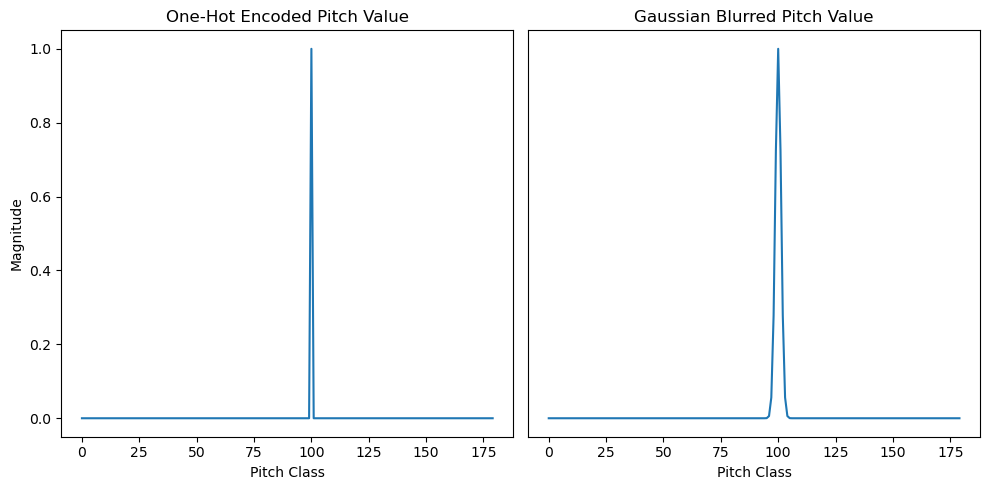

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a one-hot encoded pitch value (example)
pitch_value = np.zeros(180)
pitch_value[100] = 1  # Assuming pitch value of 100 Hz

# Gaussian kernel creation
i = np.arange(-120, 121, 20)
kernel = np.exp(-i**2 / 1250)

# Convolution of one-hot encoded pitch value with Gaussian kernel
pitch_blurred = np.convolve(pitch_value, kernel, mode='same')

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(pitch_value)
plt.title('One-Hot Encoded Pitch Value')
plt.xlabel('Pitch Class')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(pitch_blurred)
plt.title('Gaussian Blurred Pitch Value')
plt.xlabel('Pitch Class')
plt.yticks([])

plt.tight_layout()
from egaznepy.visualize import apply_plot_style
apply_plot_style(0.9)
plt.rcParams['text.usetex'] = False
plt.show()


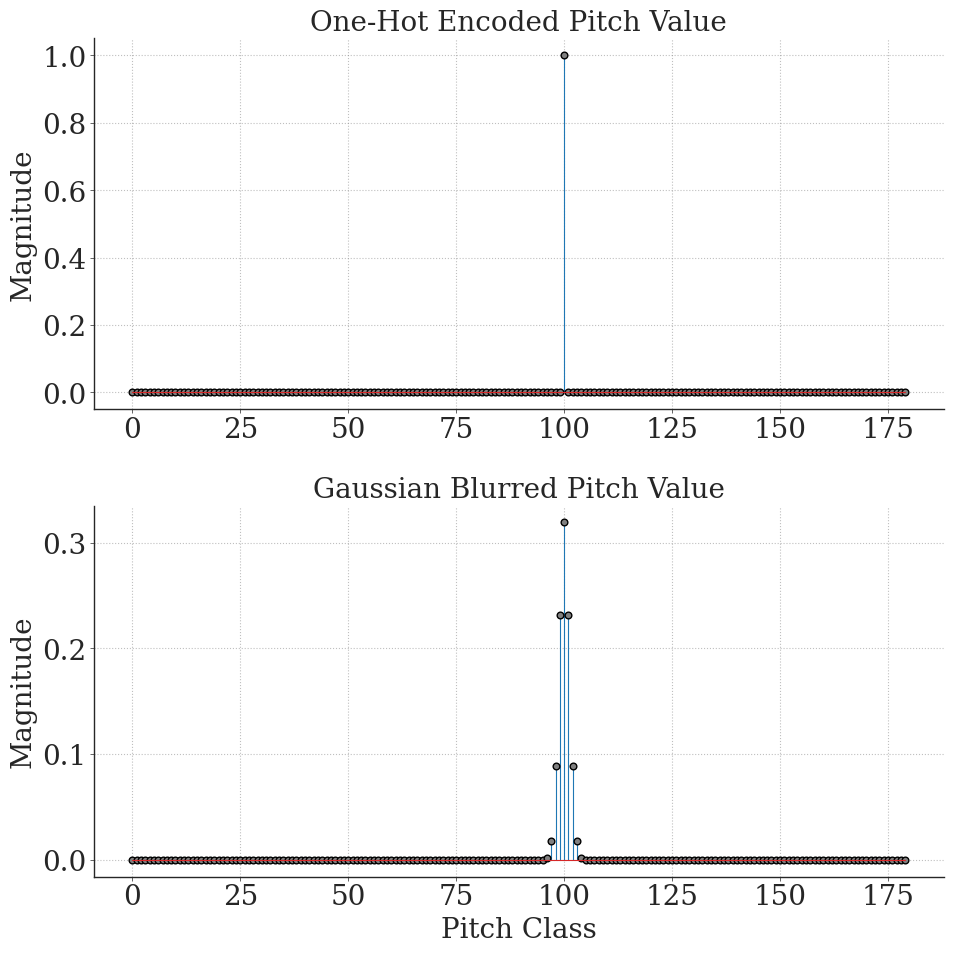

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from egaznepy.visualize import apply_plot_style
apply_plot_style(1.4)

# Generate a one-hot encoded pitch value (example)
pitch_value = np.zeros(180)
pitch_value[100] = 1  # Assuming pitch value of 100 Hz

# Gaussian kernel creation
i = np.arange(-120, 121, 20)
kernel = np.exp(-i**2 / 1250)

# Convolution of one-hot encoded pitch value with Gaussian kernel
pitch_blurred = np.convolve(pitch_value, kernel, mode='same')
pitch_blurred = pitch_blurred / np.sum(pitch_blurred)  # Normalize the blurred pitch values

# Plotting
plt.figure(figsize=(10, 10))  # Adjusted figure size for vertical layout

# Stem plot for One-Hot Encoded Pitch Value
plt.subplot(2, 1, 1)  # Changed to 2 rows, 1 column, 1st subplot
plt.stem(pitch_value)
plt.title('One-Hot Encoded Pitch Value',fontsize=20)

plt.ylabel('Magnitude',fontsize=20)

# Stem plot for Gaussian Blurred Pitch Value
plt.subplot(2, 1, 2)  # Changed to 2 rows, 1 column, 2nd subplot
plt.stem(pitch_blurred)
plt.title('Gaussian Blurred Pitch Value',fontsize=20)
plt.xlabel('Pitch Class',fontsize=20)
plt.ylabel('Magnitude',fontsize=20)


plt.tight_layout()

# Apply plot style if required (commented out as this function is not standard)
from egaznepy.visualize import apply_plot_style
apply_plot_style(0.9)
plt.rcParams['text.usetex'] = False
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 22})
plt.show()


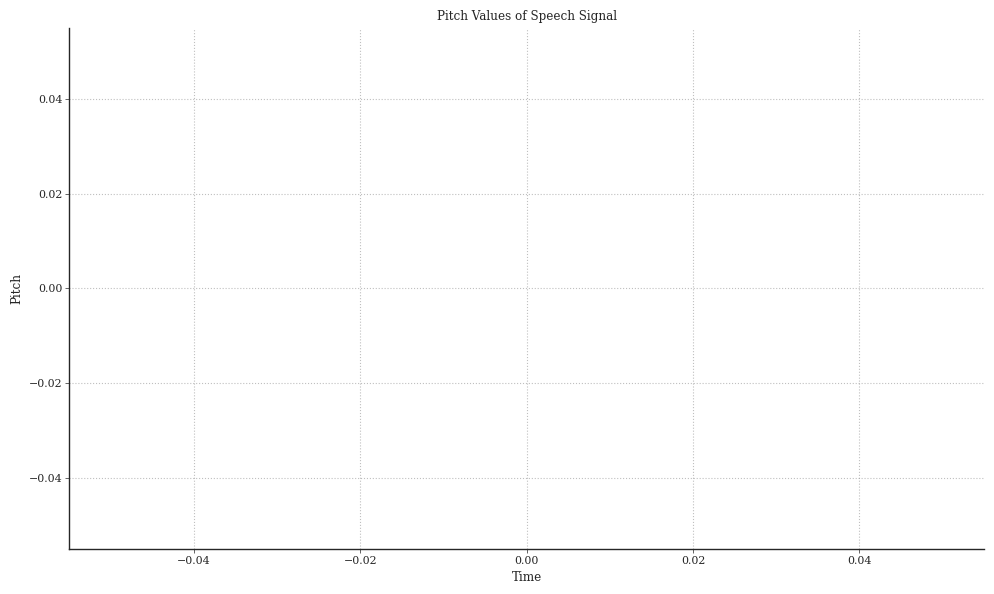

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file containing pitch values
csv_file = "/dataHDD/chsaikeerthi/2024-chirumamilla/SX21DAS0.csv"  # Replace with the path to your CSV file
df = pd.read_csv(csv_file)

# Extract pitch values from the DataFrame
pitch_values = df.values

# Plot the pitch values
plt.figure(figsize=(10, 6))
plt.plot(pitch_values, color='blue')
plt.xlabel('Time')
plt.ylabel('Pitch')
plt.title('Pitch Values of Speech Signal')
plt.grid(True)
plt.show()
